In [1]:
# Import libraries
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

In [2]:
# Load the titanic dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Drop unsused column
titanic_df.drop('Name', axis=1, inplace=True)
titanic_df.drop('PassengerId', axis=1, inplace=True)
titanic_df.drop('Ticket', axis=1, inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)
titanic_df.drop('Fare', axis=1, inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [4]:
# Filling na for Age and Embarked
titanic_df["Embarked"] = titanic_df["Embarked"].bfill()
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].mean())
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [5]:
# Apply one-hot encoding to the 'Sex' column
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.drop('Sex_male', axis=1, inplace=True)

titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.drop('Embarked_S', axis=1, inplace=True)

titanic_df = pd.get_dummies(titanic_df, prefix="Pclass", columns=["Pclass"])
titanic_df.drop('Pclass_3', axis=1, inplace=True)
titanic_df.head()

,Survived,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Pclass_1,Pclass_2
0,0,22.0,1,0,False,False,False,False,False
1,1,38.0,1,0,True,True,False,True,False
2,1,26.0,0,0,True,False,False,False,False
3,1,35.0,1,0,True,False,False,True,False
4,0,35.0,0,0,False,False,False,False,False


In [6]:
titanic_df.head()

,Survived,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Pclass_1,Pclass_2
0,0,22.0,1,0,False,False,False,False,False
1,1,38.0,1,0,True,True,False,True,False
2,1,26.0,0,0,True,False,False,False,False
3,1,35.0,1,0,True,False,False,True,False
4,0,35.0,0,0,False,False,False,False,False


In [7]:
# Splitting data
X = titanic_df.loc[:,['Age', 'SibSp', 'Parch', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Pclass_1','Pclass_2']].values
y = titanic_df.loc[:,'Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=49)

# Create random forest
forest = RandomForestClassifier(n_estimators=100, random_state=7)
forest.fit(X_train, y_train)
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
print(feature_imp)

0    0.400134
3    0.324480
1    0.075956
6    0.069794
2    0.058067
7    0.033215
4    0.022634
5    0.015719
dtype: float64


By referening the data above, Age is the one that contributes the most, second is Sex. The least important is "Embarked"

In [8]:
# Using GridSearchCV to find best estimator
params = {
    'max_depth' : [5,6,7,8,10,15,20],
    'n_estimators' : [5, 10, 15, 20, 30, 50, 100]
}
grid_search = GridSearchCV(estimator = forest,
                           param_grid = params,
                           cv = 4,
                           scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=7),
             param_grid={'max_depth': [5, 6, 7, 8, 10, 15, 20],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 100]},
             scoring='accuracy')

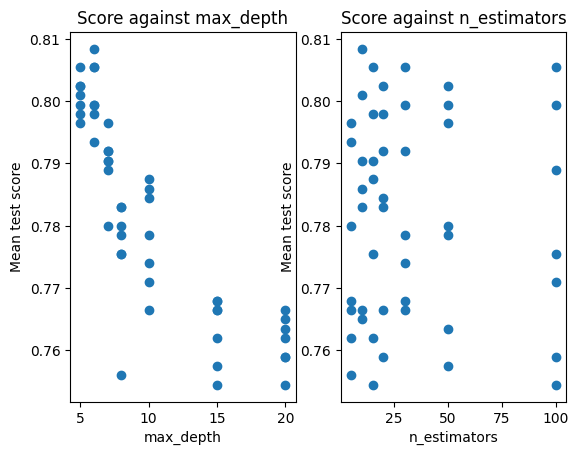

In [9]:
# Transforming GridsearchCV result to dataframe and display
gs_result = grid_search.cv_results_
gs_result_df= pd.DataFrame.from_dict(gs_result)

# Plotting graph to display result
plt.subplot(1,2,1)
plt.scatter(gs_result_df.loc[:,"param_max_depth"], gs_result_df.loc[:,"mean_test_score"])
plt.title('Score against max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean test score')
plt.subplot(1,2,2)
plt.scatter(gs_result_df.loc[:,"param_n_estimators"], gs_result_df.loc[:,"mean_test_score"])
plt.title('Score against n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Mean test score')
plt.show()

In [10]:
# Getting best score and estimator
print('Best score : ',grid_search.best_score_)
print(grid_search.best_estimator_)

Best score :  0.8083832335329342
RandomForestClassifier(max_depth=6, n_estimators=10, random_state=7)


In [11]:
# Use best estimator to create random forest
forest2 = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=7)
forest2.fit(X_train, y_train)
print("Accuracy for n_estimators = 100, no limit on max_depth :", forest.score(X_test,y_test))
print("Accuracy for n_estimators = 10, max_depth = 6: ", forest2.score(X_test,y_test))

Accuracy for n_estimators = 100, no limit on max_depth : 0.820627802690583
Accuracy for n_estimators = 10, max_depth = 6:  0.8251121076233184


Using best estimator increase the score around 0.0045.

# Challenge

In [12]:
# Applying AdaBoostClassifier to create boosted tree
base_tree_ada = DecisionTreeClassifier(max_depth = 1)
ada_boost = AdaBoostClassifier(estimator= base_tree_ada, n_estimators= 100, random_state= 64)
ada_boost.fit(X_train, y_train)
print("n= 100 score: ", ada_boost.score(X_test,y_test))

n= 100 score:  0.8071748878923767


In [13]:
ada_boost_200 = AdaBoostClassifier(estimator= base_tree_ada, n_estimators= 200, random_state= 64)
ada_boost_200.fit(X_train, y_train)
print("n= 200 score: ", ada_boost_200.score(X_test,y_test))
ada_boost_500 = AdaBoostClassifier(estimator= base_tree_ada, n_estimators= 500, random_state= 64)
ada_boost_500.fit(X_train, y_train)
print("n= 500 score: ", ada_boost_500.score(X_test,y_test))

base_tree_ada_2 = DecisionTreeClassifier(max_depth = 2)
ada_boost_200_2 = AdaBoostClassifier(estimator= base_tree_ada_2, n_estimators= 200, random_state= 64)
ada_boost_200_2.fit(X_train, y_train)
print("max_depth= 2, n= 200 score: ", ada_boost_200_2.score(X_test,y_test))
ada_boost_500_2 = AdaBoostClassifier(estimator= base_tree_ada_2, n_estimators= 500, random_state= 64)
ada_boost_500_2.fit(X_train, y_train)
print("max_depth= 2, n= 500 score: ", ada_boost_500_2.score(X_test,y_test))

n= 200 score:  0.8116591928251121
n= 500 score:  0.8116591928251121
max_depth= 2, n= 200 score:  0.8340807174887892
max_depth= 2, n= 500 score:  0.8295964125560538


In [14]:
# Applying BaggingClassifier to create boosted tree
base_tree_bagging = DecisionTreeClassifier()
bag_reg = BaggingClassifier(estimator=base_tree_bagging, n_estimators= 100, random_state= 64)
bag_reg.fit(X_train, y_train)
print("n=100 score: ", bag_reg.score(X_test,y_test))

n=100 score:  0.820627802690583


In [15]:
bag_reg_200 = BaggingClassifier(estimator=base_tree_bagging, n_estimators= 200, random_state= 64)
bag_reg_200.fit(X_train, y_train)
print("n=200 score: ", bag_reg_200.score(X_test,y_test))
bag_reg_500 = BaggingClassifier(estimator=base_tree_bagging, n_estimators= 500, random_state= 64)
bag_reg_500.fit(X_train, y_train)
print("n=500 score: ", bag_reg_500.score(X_test,y_test))

base_tree_bagging_6 = DecisionTreeClassifier(max_depth=6)
bag_reg_200_6 = BaggingClassifier(estimator=base_tree_bagging_6, n_estimators= 200, random_state= 64)
bag_reg_200_6.fit(X_train, y_train)
print("max_depth= 6, n=200 score: ", bag_reg_200_6.score(X_test,y_test))
bag_reg_500_6 = BaggingClassifier(estimator=base_tree_bagging_6, n_estimators= 500, random_state= 64)
bag_reg_500_6.fit(X_train, y_train)
print("max_depth= 6, n=500 score: ", bag_reg_500_6.score(X_test,y_test))

n=200 score:  0.8251121076233184
n=500 score:  0.8295964125560538
max_depth= 6, n=200 score:  0.8295964125560538
max_depth= 6, n=500 score:  0.8340807174887892


# Conclusion
Although max_depth and n_estimators are roughly tested on AdaBoost and Bagging, both of them are having accuracy 0.834 which is a better result compare to just using Random Forest (0.825).